### Project Name: House Prices: Advanced Regression Techniques
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

#### Data Analysis Phase

##### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [6]:
# Importing All require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [7]:
# showing all columns
pd.pandas.set_option('display.max_columns', None)

In [8]:
# Loading the data set
df = pd.read_csv('train.csv')

In [9]:
# showing some data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Some basic operations

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.shape

(1460, 81)

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values

In [15]:


value_na_cols = [feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in value_na_cols:
    print(f'{feature} = {df[feature].isnull().mean()*100} %')

LotFrontage = 17.73972602739726 %
Alley = 93.76712328767123 %
MasVnrType = 59.726027397260275 %
MasVnrArea = 0.547945205479452 %
BsmtQual = 2.5342465753424657 %
BsmtCond = 2.5342465753424657 %
BsmtExposure = 2.6027397260273974 %
BsmtFinType1 = 2.5342465753424657 %
BsmtFinType2 = 2.6027397260273974 %
Electrical = 0.0684931506849315 %
FireplaceQu = 47.26027397260274 %
GarageType = 5.5479452054794525 %
GarageYrBlt = 5.5479452054794525 %
GarageFinish = 5.5479452054794525 %
GarageQual = 5.5479452054794525 %
GarageCond = 5.5479452054794525 %
PoolQC = 99.52054794520548 %
Fence = 80.75342465753424 %
MiscFeature = 96.30136986301369 %


### Analyize "Missing values columns" Relation with dependend variable "SalePrice"

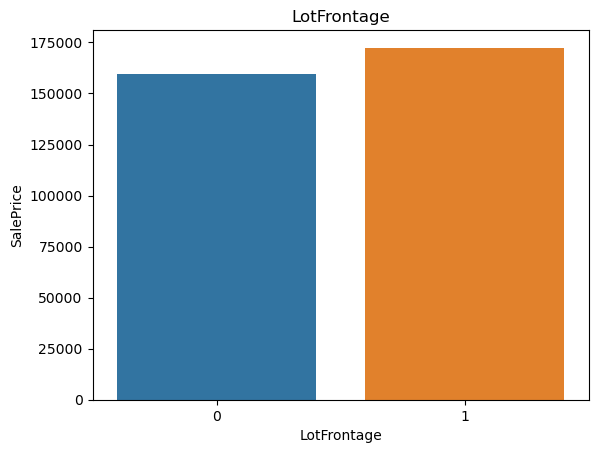

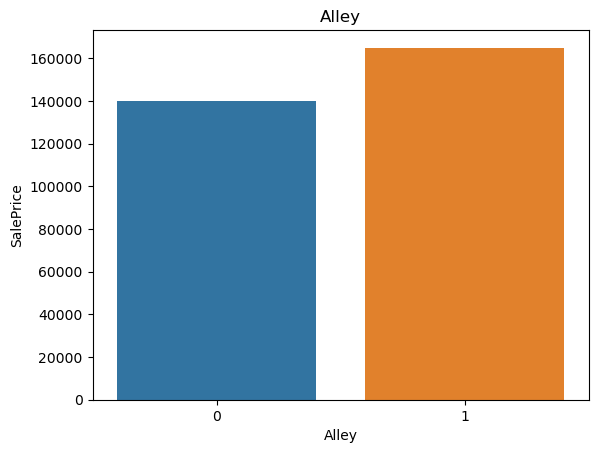

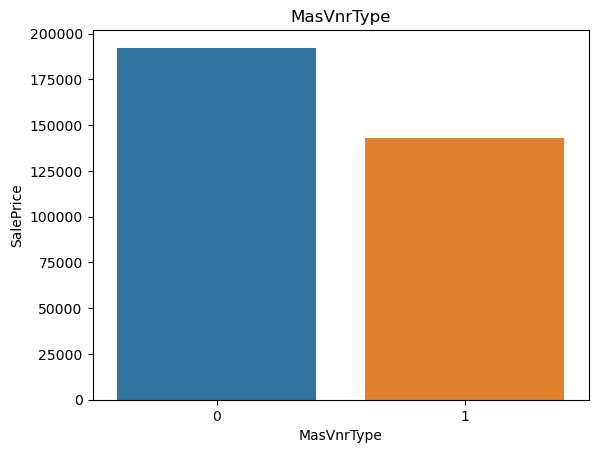

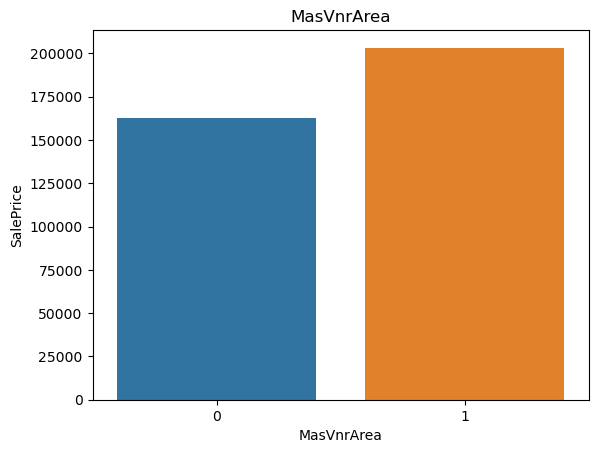

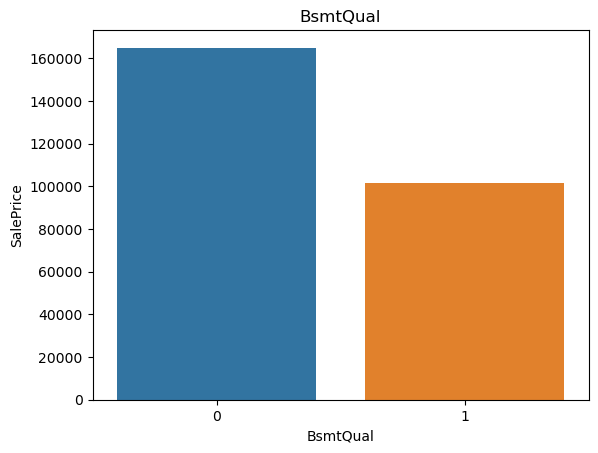

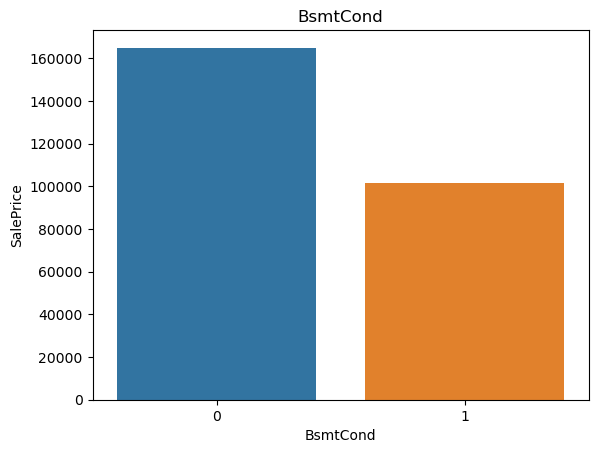

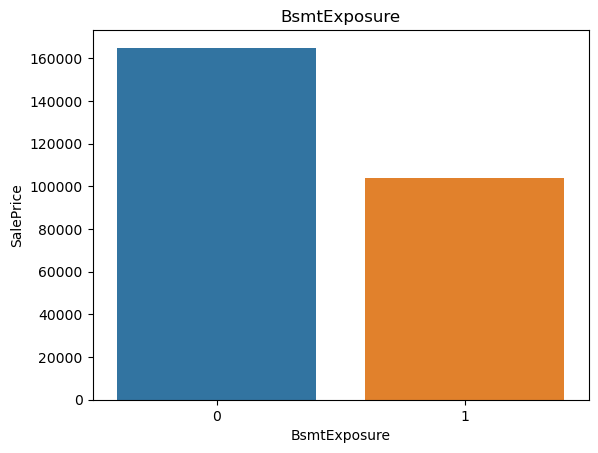

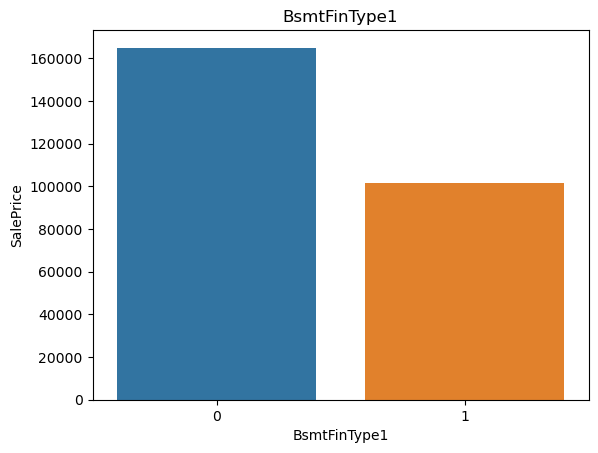

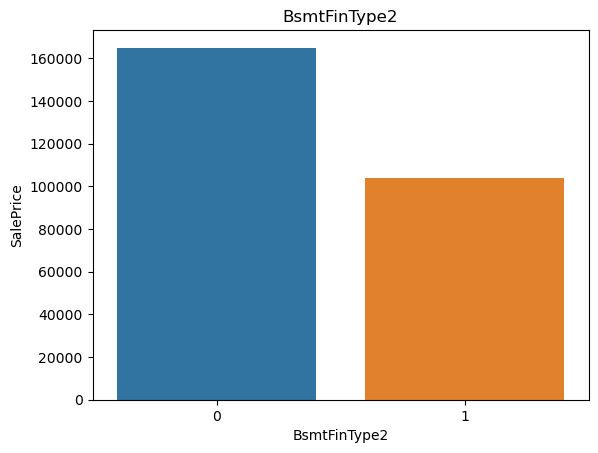

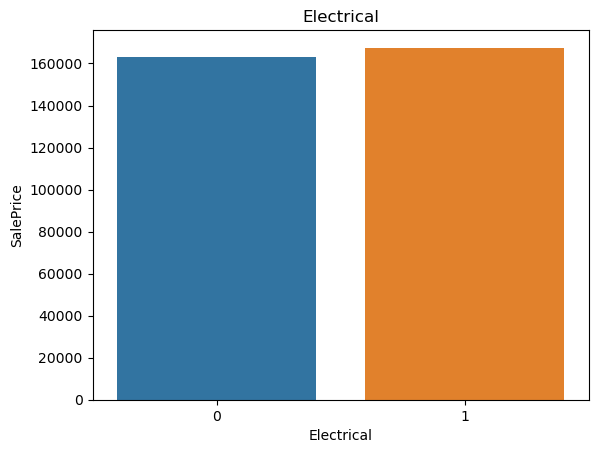

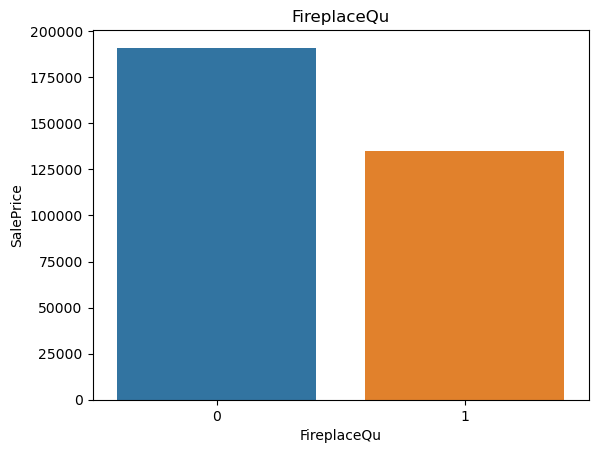

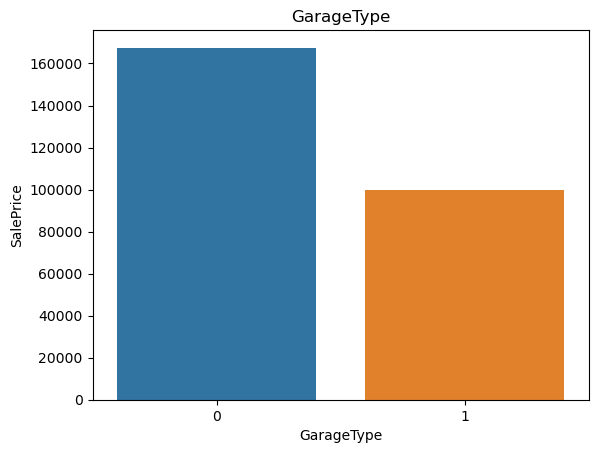

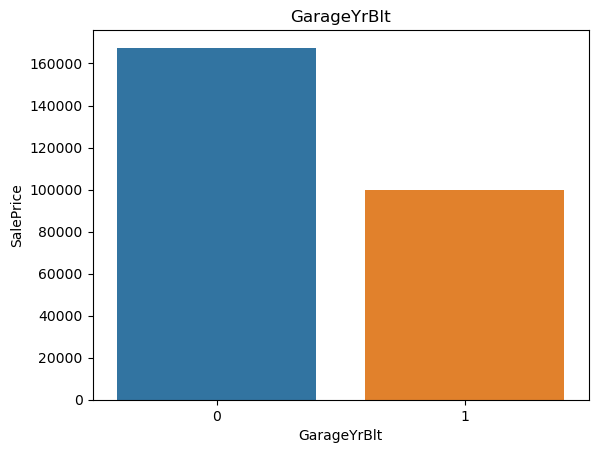

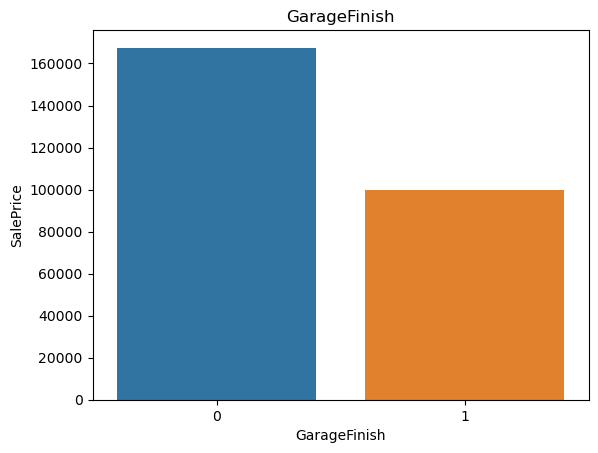

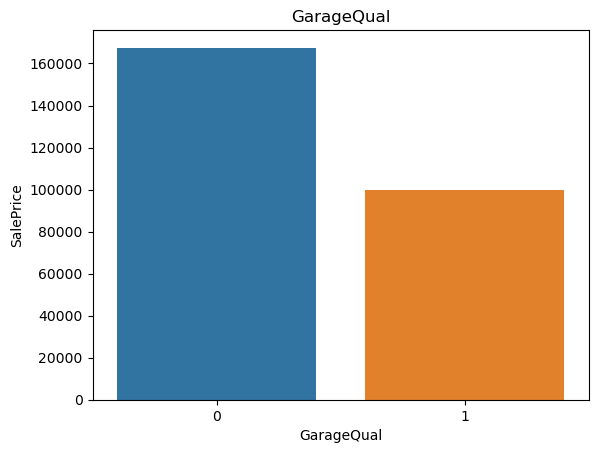

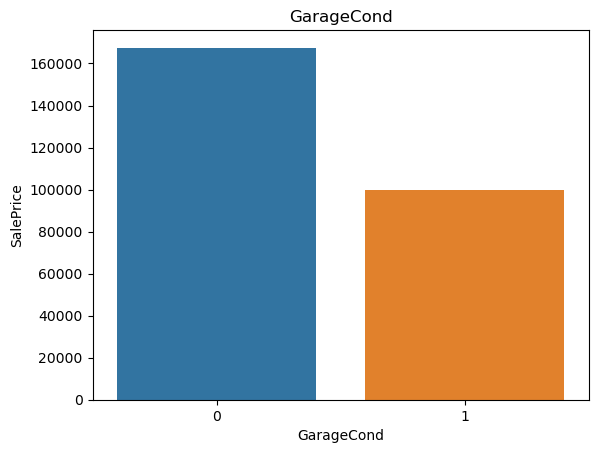

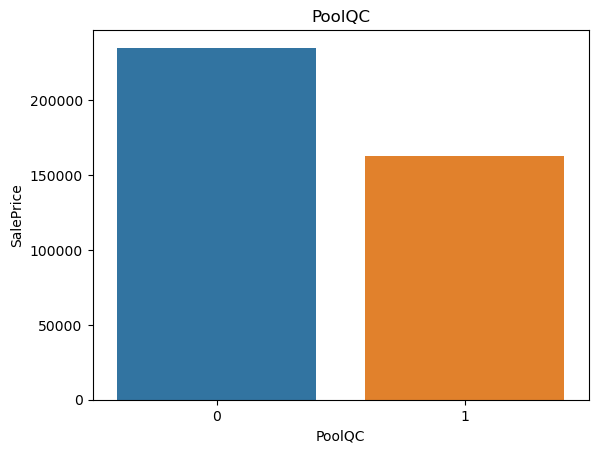

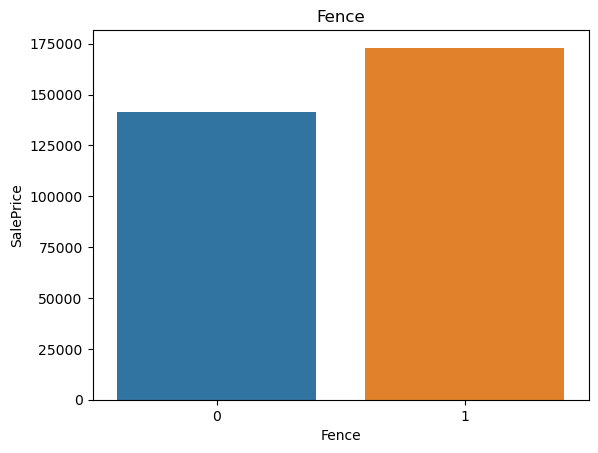

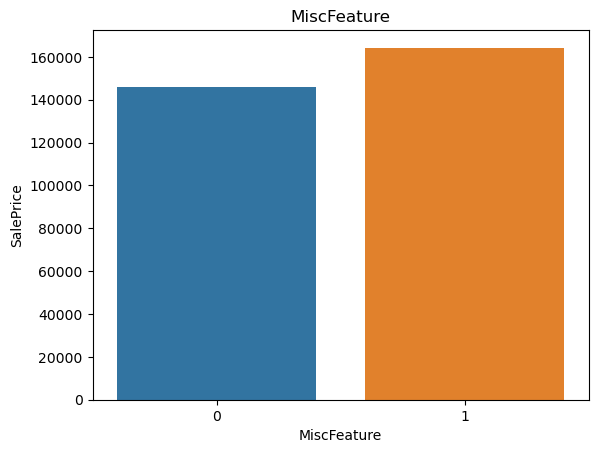

In [17]:
for feature in value_na_cols:
    data = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(),1,0)

    # making group with SalePrice to observe SalePrice with missing value
    group = data.groupby(feature)['SalePrice'].median().reset_index()
    sns.barplot(data=group, x=feature, y='SalePrice')
    plt.title(feature)
    plt.show()

#### Here , from the Analysis, the relation between missing values and SalePrice is clearly visible. We have to replace the missing values in feature engineering phase

#### Findig some of the features like Id is not required from the above dataset

In [20]:
# Feature Id is not required for our project
print(f'Id of Houses :{len(df.Id)}')

Id of Houses :1460


## Numerical Features

In [22]:
#list of the numerical variables
numerical_cols = [feature for feature in df.columns if df[feature].dtype !='O']
print(f'Total Numerical Features is = {len(numerical_cols)}' )

Total Numerical Features is = 38


In [23]:
# some numerical data
df[numerical_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal features
        Temporal features contain year, day, time  (date time data). We can extract information like year sold, num of year or number of day and many more.  

In [25]:
# In this data set have about 4 temporal variable

#list of temporal(date time) features
temporal = [feature for feature in numerical_cols if "Year" in feature or 'Yr' in feature]
temporal

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
df[temporal].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
5,1993,1995,1993.0,2009
6,2004,2005,2004.0,2007
7,1973,1973,1973.0,2009
8,1931,1950,1931.0,2008
9,1939,1950,1939.0,2008


In [27]:
df.YrSold.value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

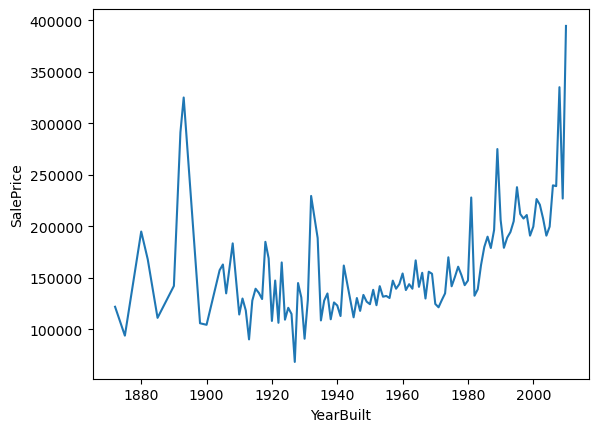

In [28]:
# Exploring YearBuilt feature relation with SalePrice

# Making group with SalePrice feature
group_ = df.groupby('YearBuilt')["SalePrice"].median().reset_index()


sns.lineplot(data=group_, x='YearBuilt', y='SalePrice')
plt.show()

### Observation
    Old house price is less than new house price

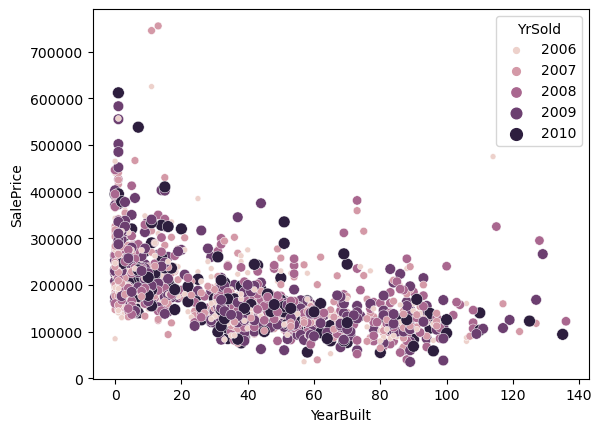

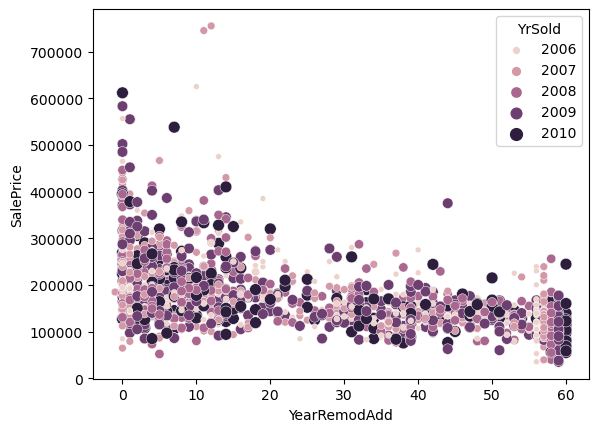

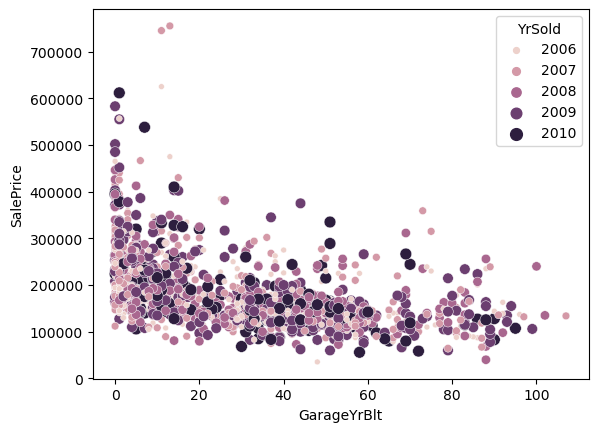

In [30]:
# seeing all year feature relation ship with SalePrice


for feature in temporal:
    if feature !='YrSold':
        data = df.copy()
        # Showing SalePrice in number of year by finding defference between YrSold and other Year Data
        data[feature]= data["YrSold"] - data[feature]
        sns.scatterplot(data=data, x=data[feature], y=data['SalePrice'], hue=df.YrSold, size=df.YrSold)
        plt.show()
        

## Observation
    The lowest difference of year sold house price is always high. It means New houses Price is high.

In [33]:
#df['GarageArea'].corr(df['SalePrice'])

0.6234314389183616

## Numerical Discrete Features

In [155]:
# getting discrete feature
discrete_feature = [feature for feature in numerical_cols if len(df[feature].unique())< 50 and feature not in temporal+['Id']]
print(f'length of discrete features: {len(discrete_feature)}')

length of discrete features: 17


In [120]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [122]:
#showing discrete features data
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


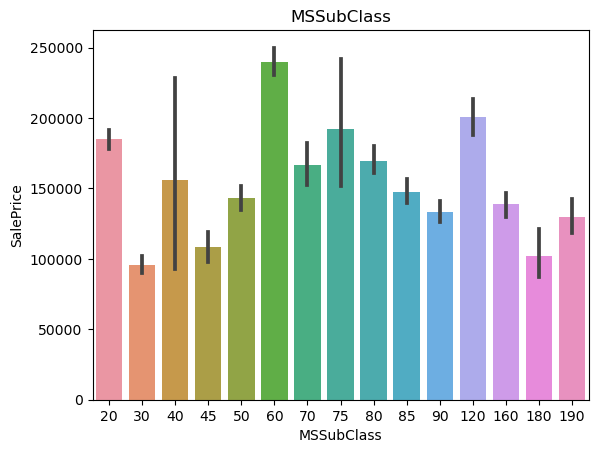

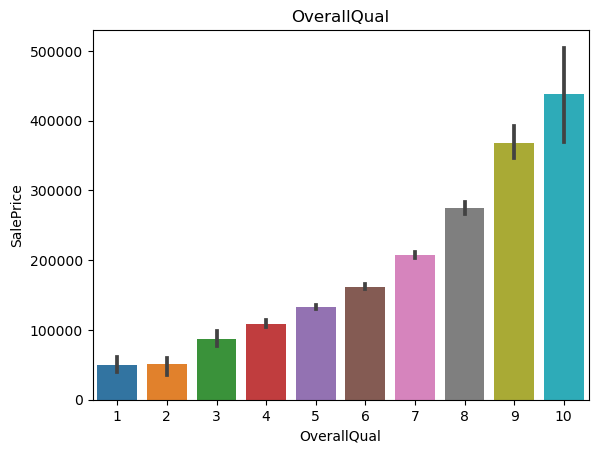

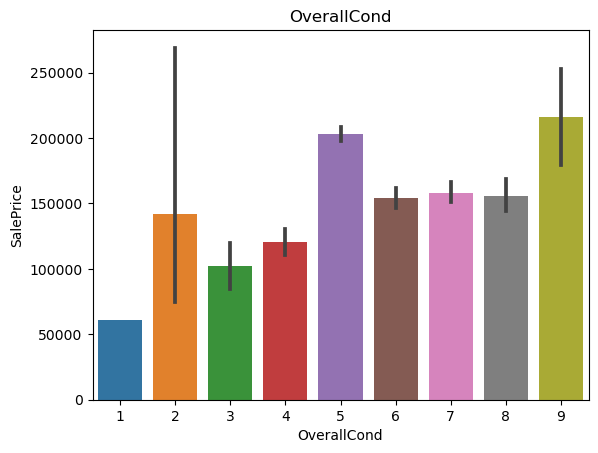

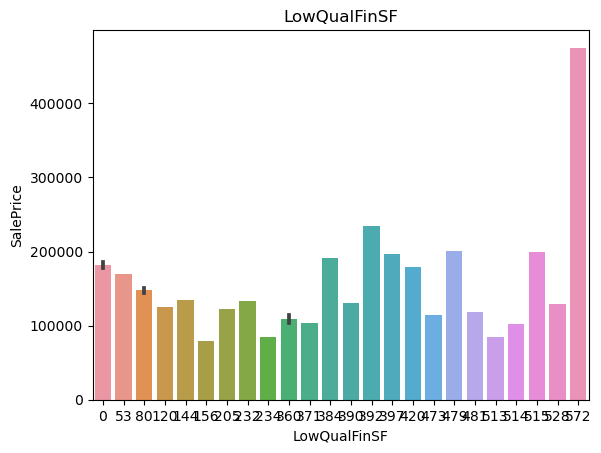

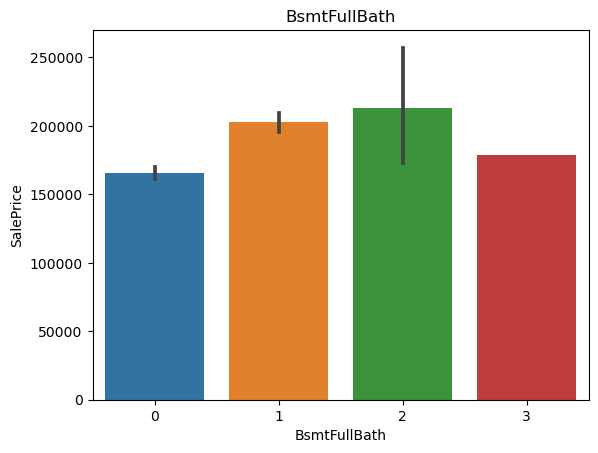

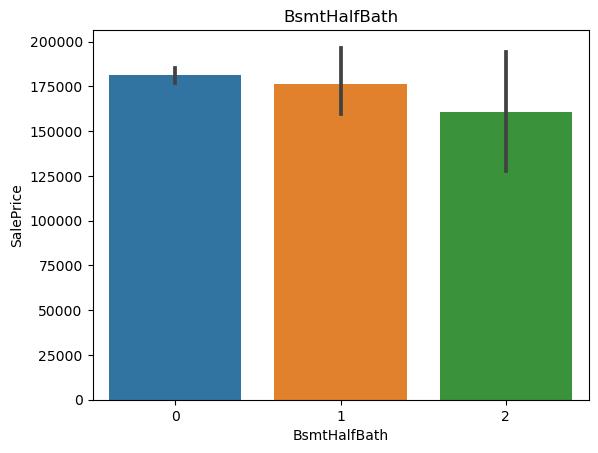

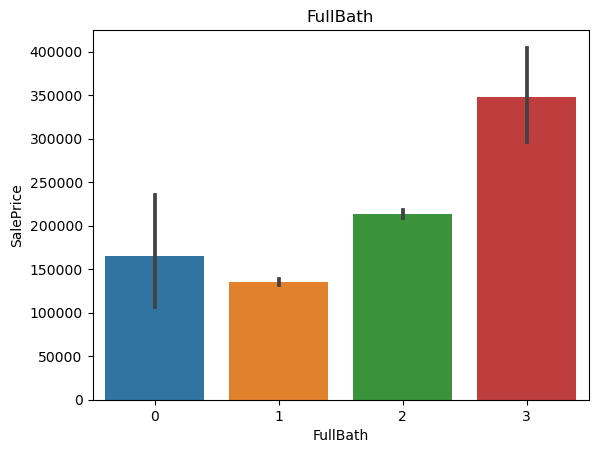

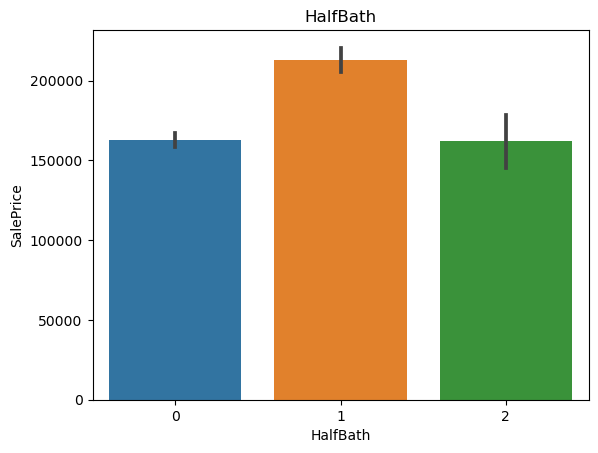

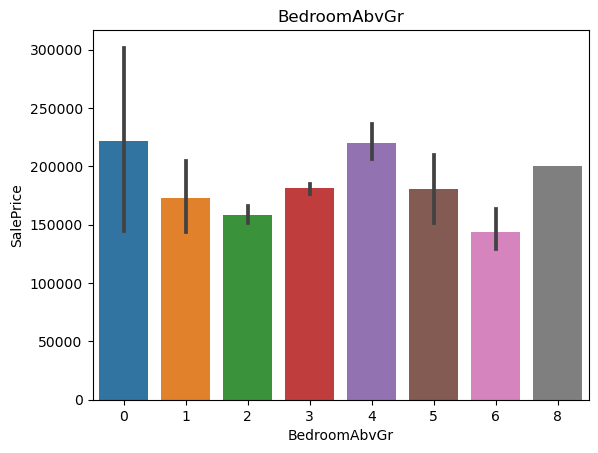

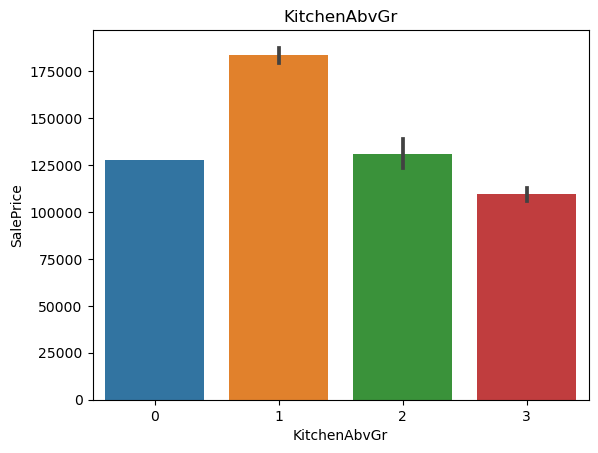

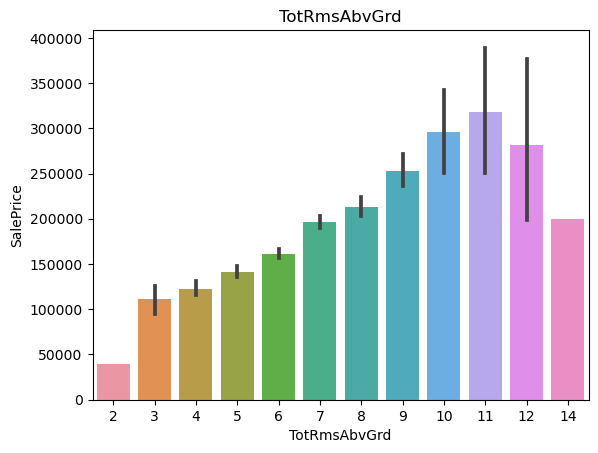

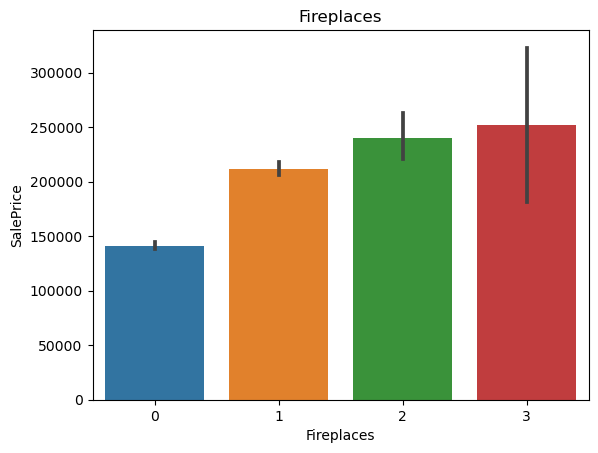

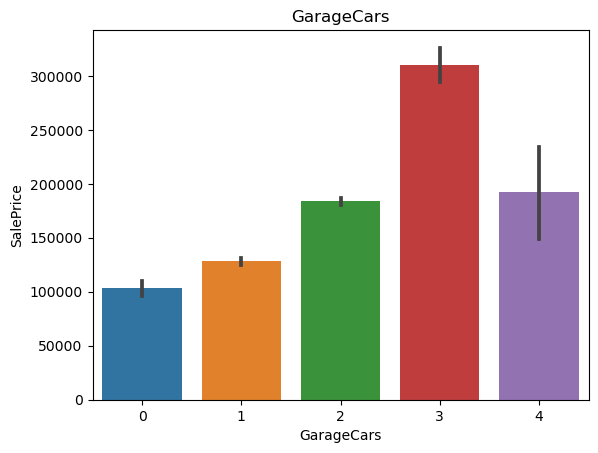

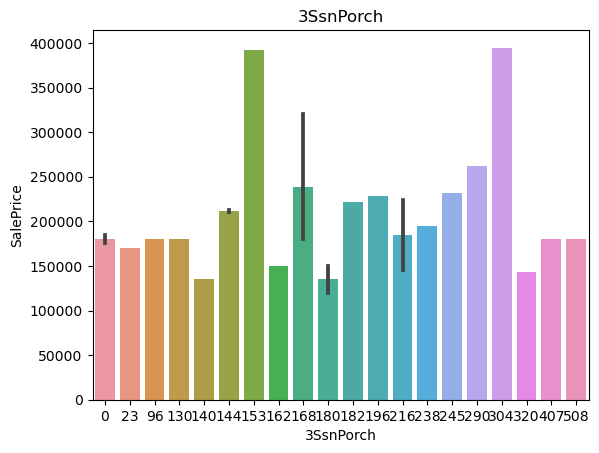

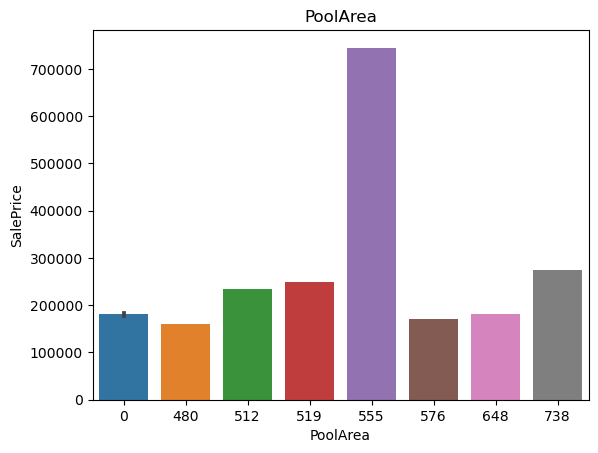

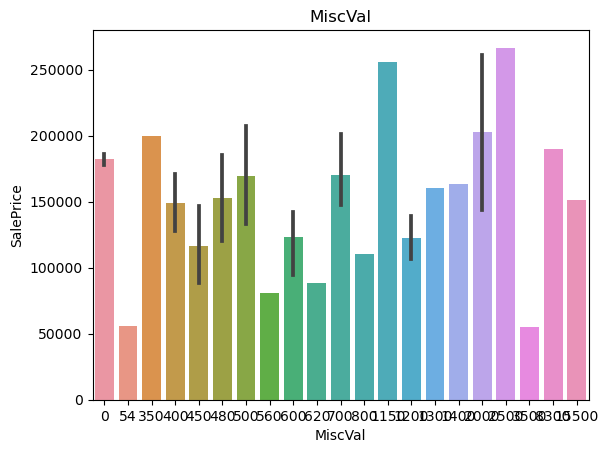

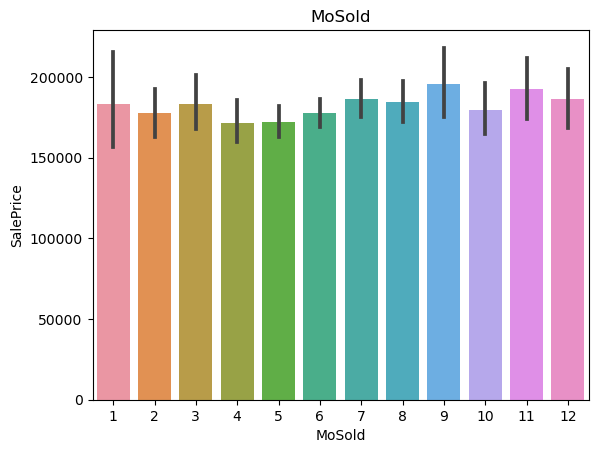

In [138]:
# seeing the relationship between 'SalePrice' and discrete variables

for feature in discrete_feature:
    data = df.copy()
    sns.barplot(data = data, x=feature, y = 'SalePrice')
    plt.title(feature)
    plt.show()

In [148]:
# Seeing corelation score with SalePrice(Dependent Variable) between discrete variables
for feature in discrete_feature:
    print(f'{feature} correlation Score with SalePrice : {(df[feature].corr(df.SalePrice))*100}')

MSSubClass correlation Score with SalePrice : -8.428413512659523
OverallQual correlation Score with SalePrice : 79.09816005838046
OverallCond correlation Score with SalePrice : -7.7855894048678005
LowQualFinSF correlation Score with SalePrice : -2.560613000067956
BsmtFullBath correlation Score with SalePrice : 22.712223313149405
BsmtHalfBath correlation Score with SalePrice : -1.6844154297359002
FullBath correlation Score with SalePrice : 56.066376274844544
HalfBath correlation Score with SalePrice : 28.410767559478277
BedroomAbvGr correlation Score with SalePrice : 16.82131543007399
KitchenAbvGr correlation Score with SalePrice : -13.590737084214105
TotRmsAbvGrd correlation Score with SalePrice : 53.37231555820281
Fireplaces correlation Score with SalePrice : 46.69288367515277
GarageCars correlation Score with SalePrice : 64.0409197258353
3SsnPorch correlation Score with SalePrice : 4.458366533574844
PoolArea correlation Score with SalePrice : 9.240354949187322
MiscVal correlation Sco

## Observation
    1. OverallQual feature is mostly positive and corr score is 79.0982
    2. GarageCars feature is also important for positive relationship with score of 64.041
    3. Here are also have some positivly skewed features like(BsmtFullBath, FullBath, HalfBath, TotRmsAbvGrd, Fireplaces BedroomAbvGr )

## Continuous features

In [159]:
## getting the continuous variables
continuous_feature = [feature for feature in numerical_cols if feature not in discrete_feature + temporal+['Id']]
print(f'length of Continuous features: {len(continuous_feature)}')

length of Continuous features: 16


In [161]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

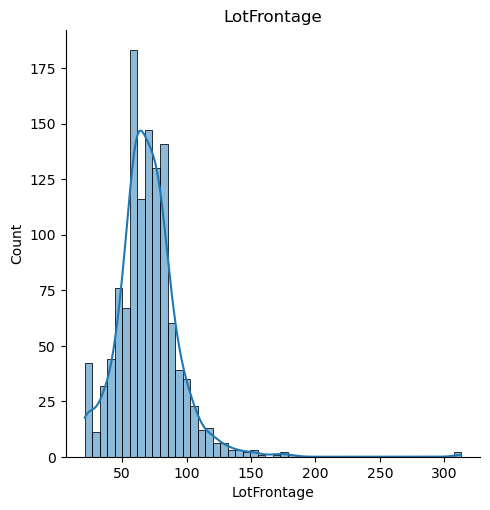

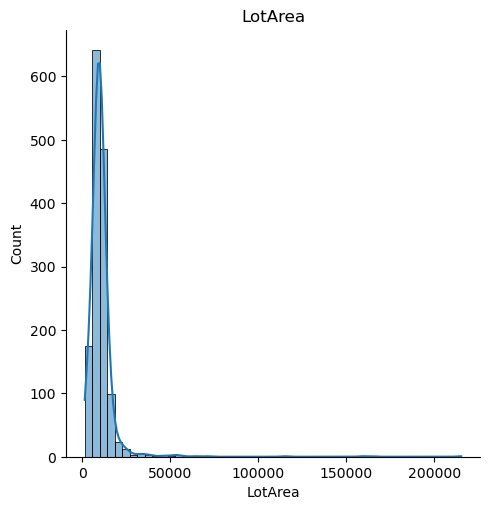

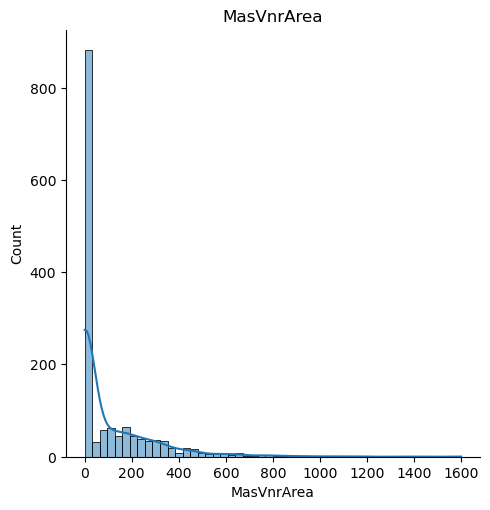

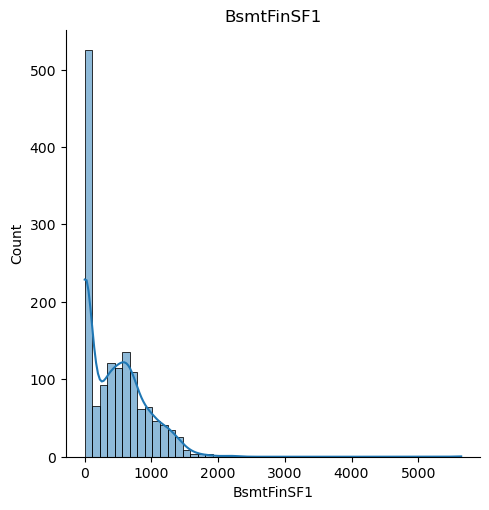

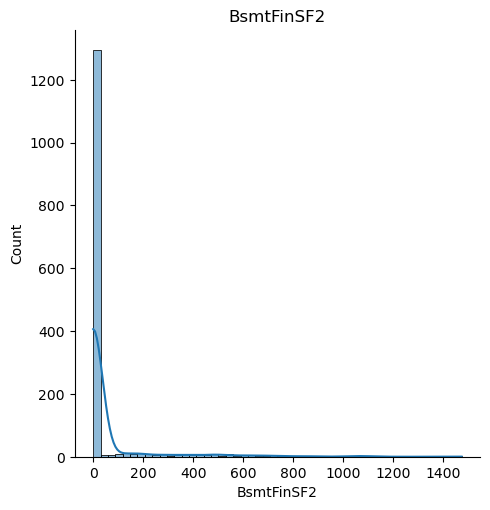

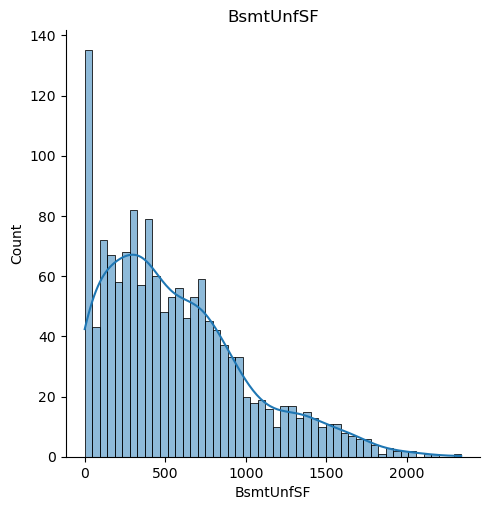

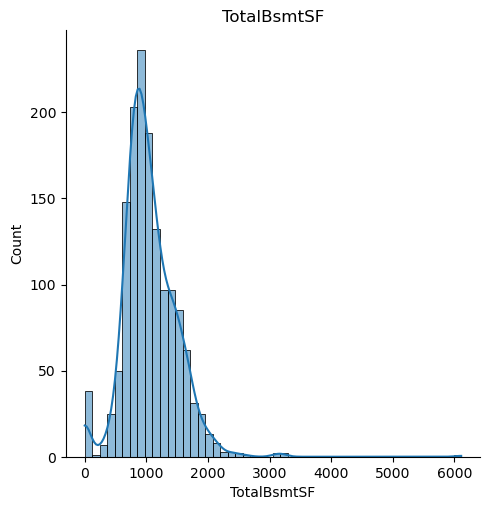

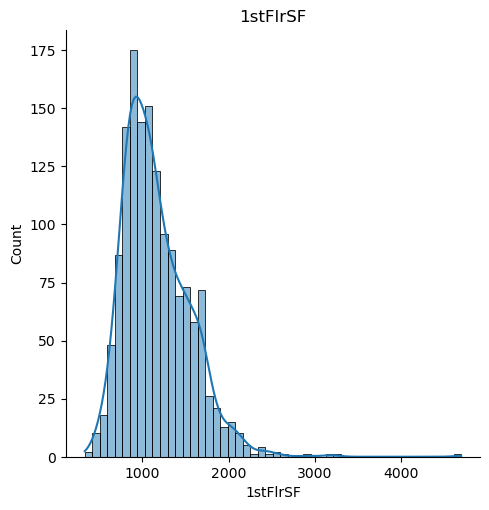

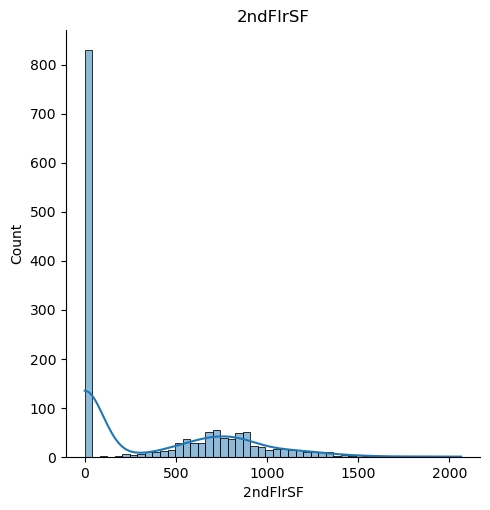

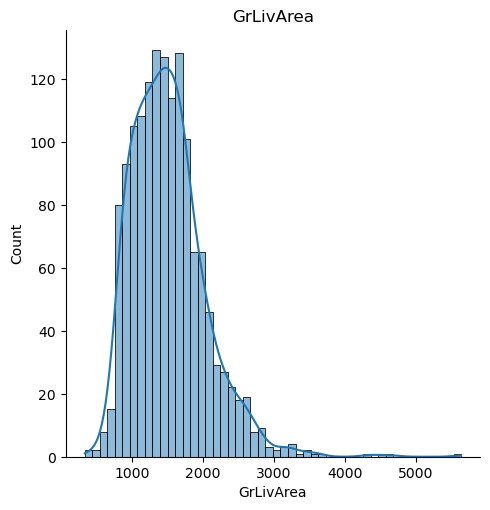

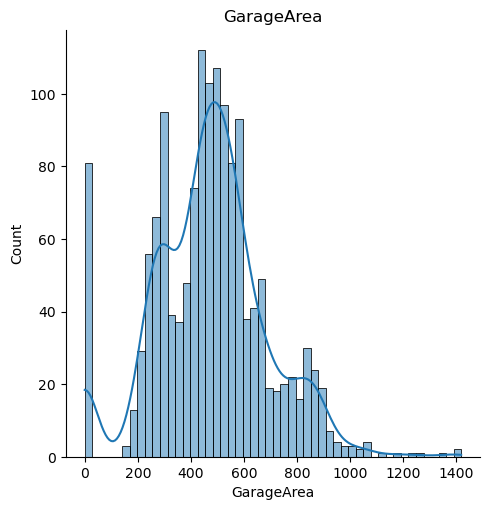

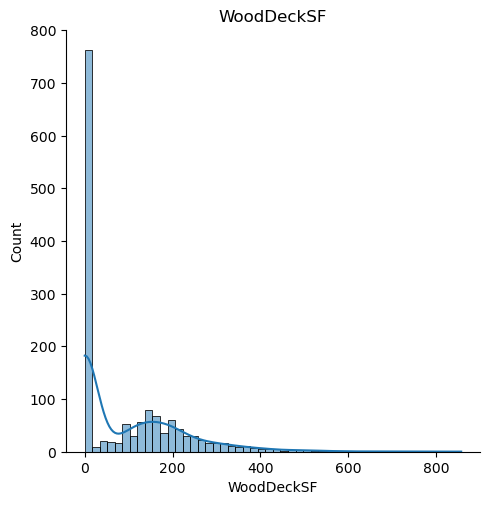

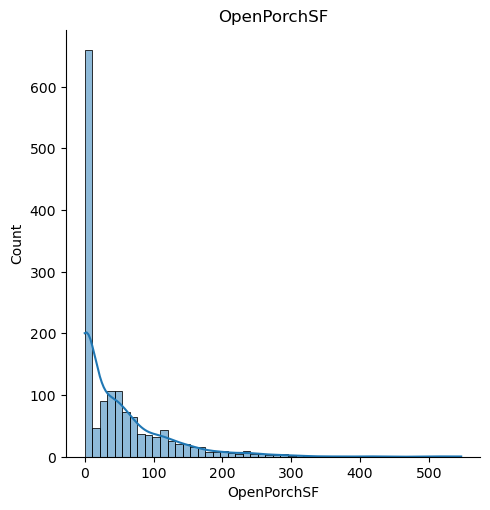

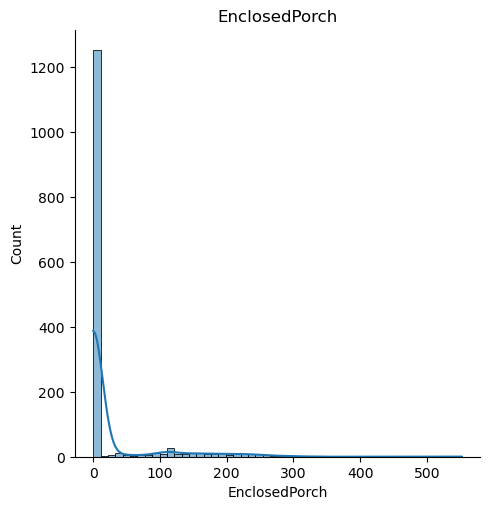

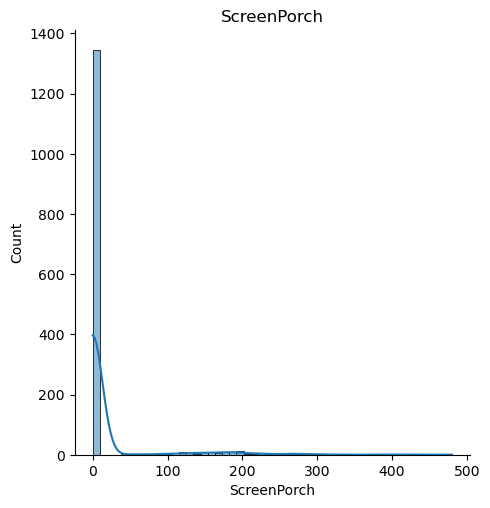

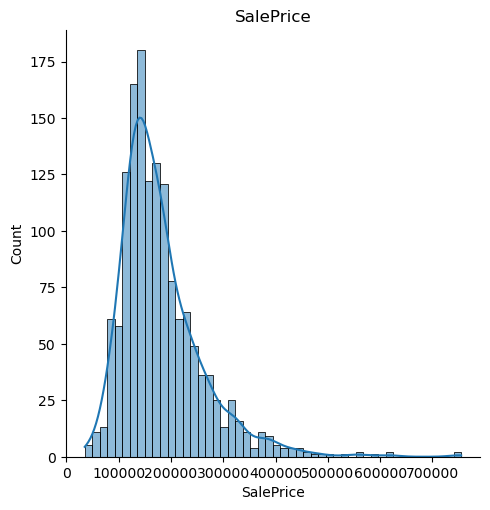

In [197]:
# seeing the distribution of continuous features

for feature in continuous_feature:
    data=df.copy()
    sns.displot(data, x=feature, kde=True, bins=50)
    plt.title(feature)
    plt.show()

In [199]:
# Seeing corelation score with SalePrice(Dependent Variable) between continuous variables
for feature in continuous_feature:
    print(f'{feature} correlation Score with SalePrice : {(df[feature].corr(df.SalePrice))*100}')

LotFrontage correlation Score with SalePrice : 35.1799096570678
LotArea correlation Score with SalePrice : 26.384335387140556
MasVnrArea correlation Score with SalePrice : 47.749304709571604
BsmtFinSF1 correlation Score with SalePrice : 38.64198062421531
BsmtFinSF2 correlation Score with SalePrice : -1.1378121450215144
BsmtUnfSF correlation Score with SalePrice : 21.447910554696893
TotalBsmtSF correlation Score with SalePrice : 61.35805515591953
1stFlrSF correlation Score with SalePrice : 60.585218469191474
2ndFlrSF correlation Score with SalePrice : 31.93338028320677
GrLivArea correlation Score with SalePrice : 70.86244776126517
GarageArea correlation Score with SalePrice : 62.343143891836164
WoodDeckSF correlation Score with SalePrice : 32.44134445681295
OpenPorchSF correlation Score with SalePrice : 31.58562271160553
EnclosedPorch correlation Score with SalePrice : -12.857795792595656
ScreenPorch correlation Score with SalePrice : 11.144657114291105
SalePrice correlation Score with 

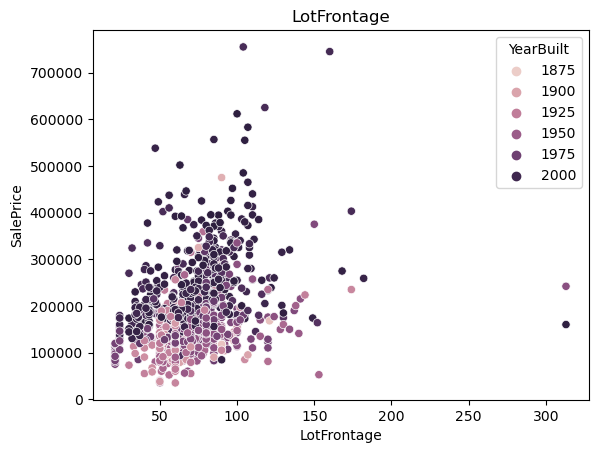

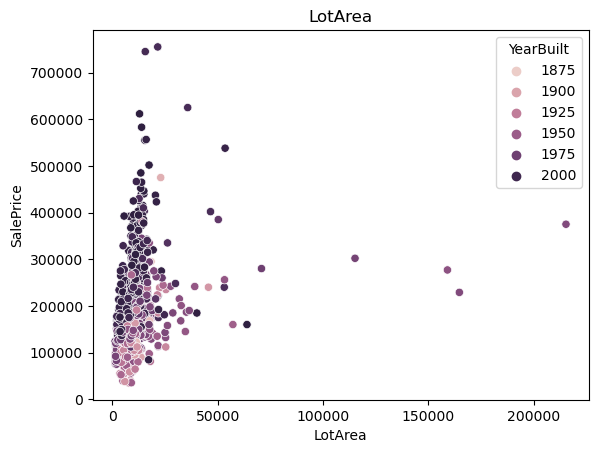

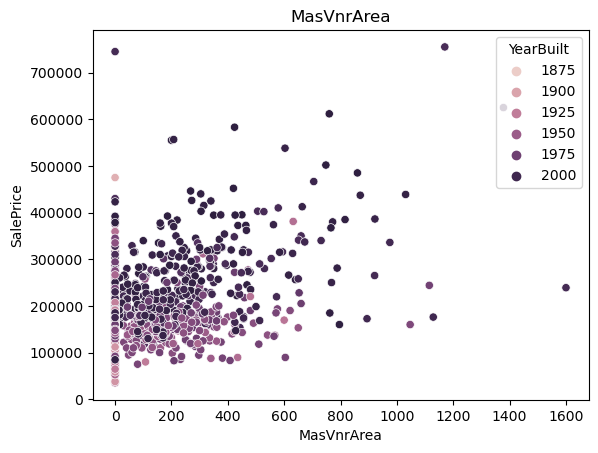

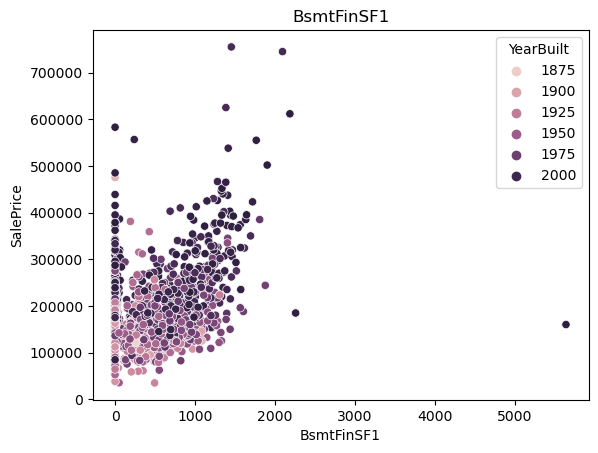

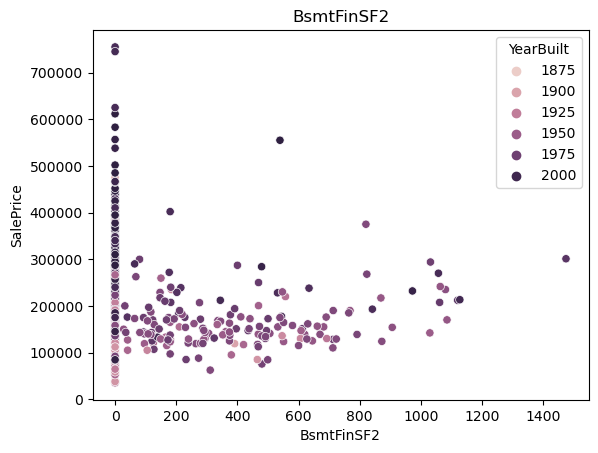

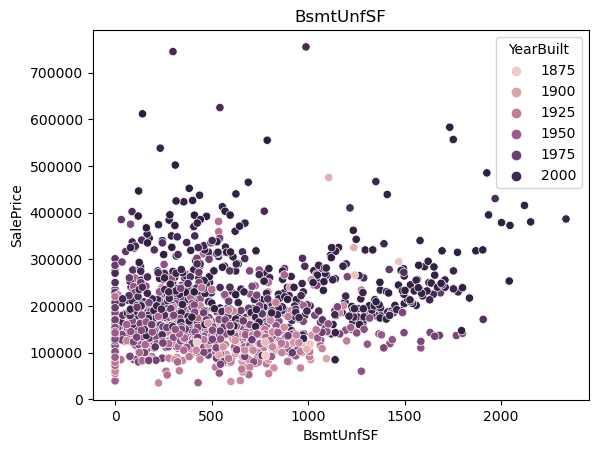

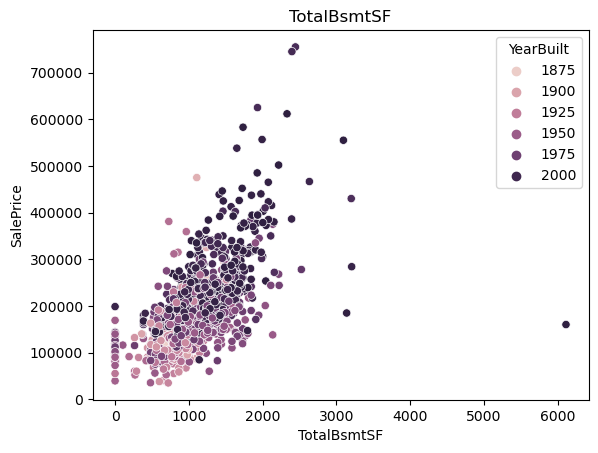

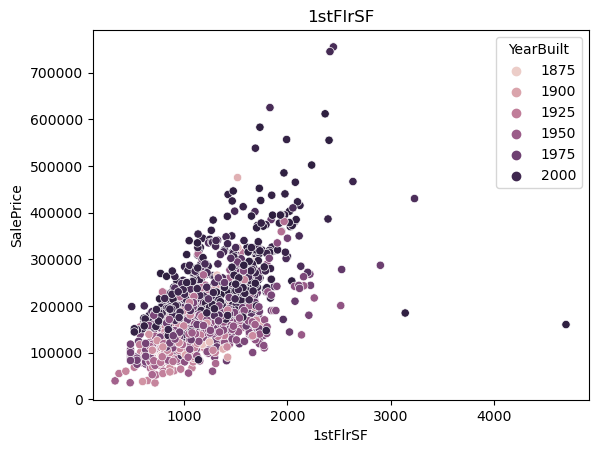

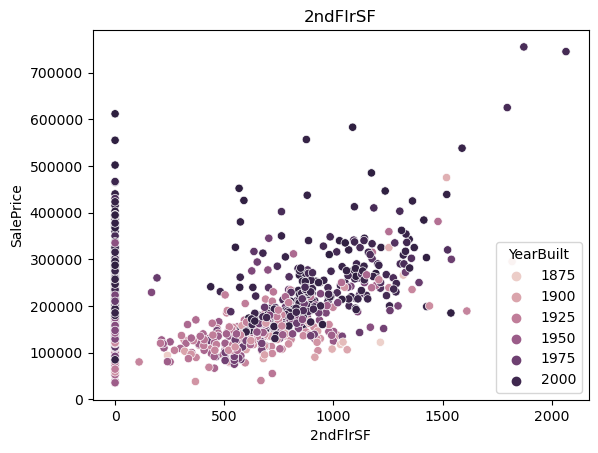

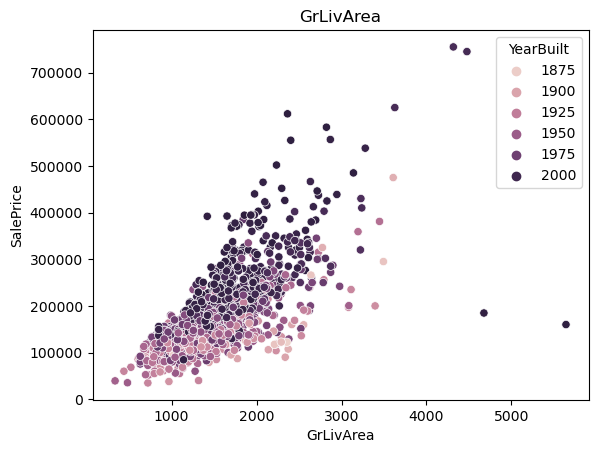

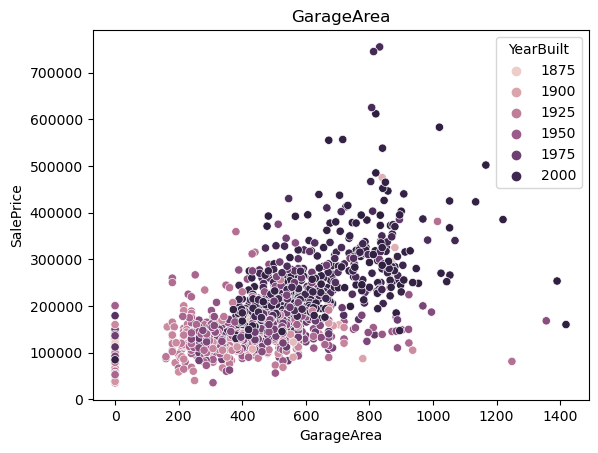

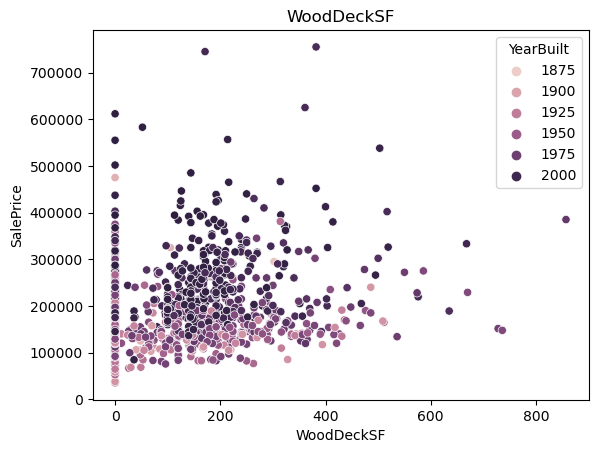

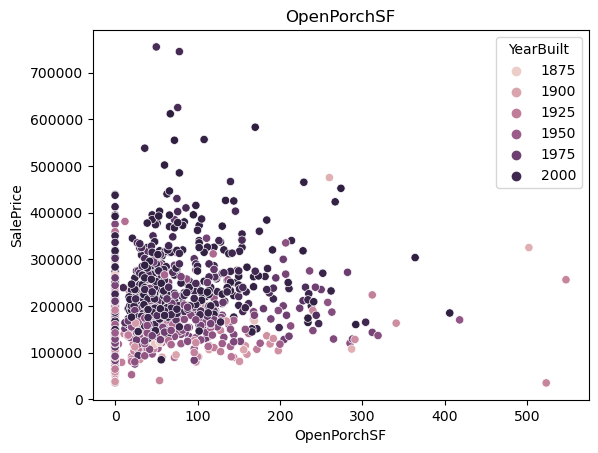

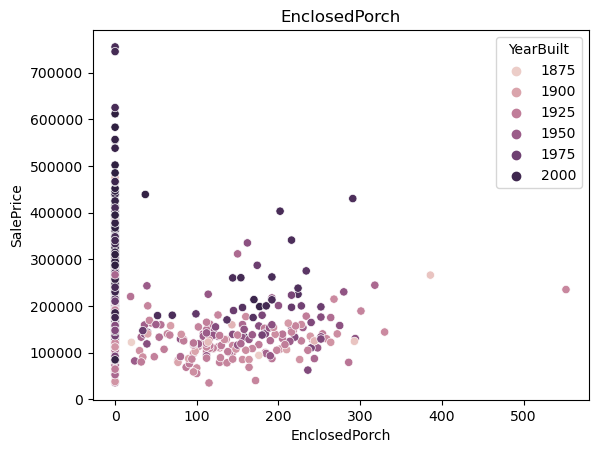

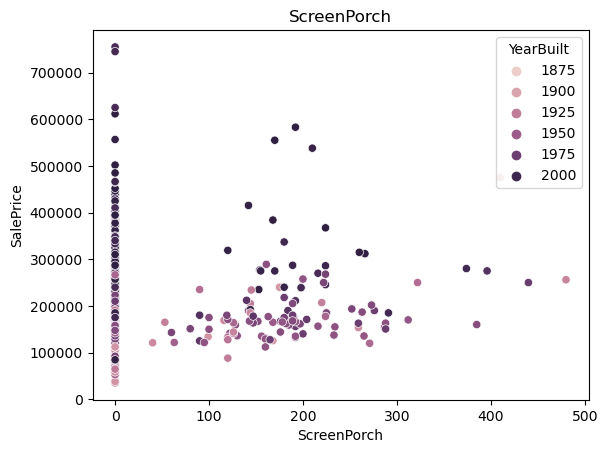

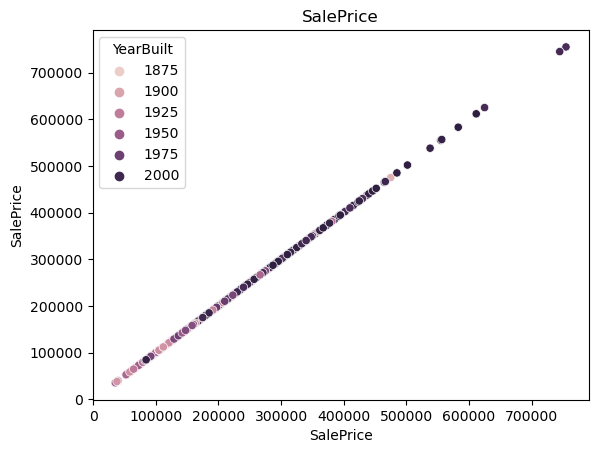

In [203]:
# Relationship with 'SalePrice'

for feature in continuous_feature:
    data=df.copy()
    sns.scatterplot(data, x=feature, y='SalePrice', hue = 'YearBuilt')
    plt.title(feature)
    plt.show()